1. Import Libraries needed and load the dataset

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("new_sensor_data.csv")

2. Get the first few data

In [74]:
df.head()

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,1716958200,35.6,103.80,974.548,75.488,40.6,40.6,8654.3520,2552.037,402.651,31.4750,5.909
1,1712625600,59.0,89.25,975.540,94.300,24.9,24.9,5019.9975,1470.028,267.220,25.4115,4.956
2,1712636400,44.4,100.20,973.482,88.790,38.6,38.6,7882.2940,2315.513,404.434,36.0690,7.345
3,1712214600,43.6,100.80,971.152,72.978,4.1,4.1,1050.6190,298.393,33.164,2.6890,1.183
4,1712213400,42.6,101.20,971.124,83.036,5.6,5.6,1372.1910,393.363,51.584,6.1850,2.503


In [75]:
df.describe()

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
count,8.168000e+03,8168.000000,8168.000000,8168.000000,8167.000000,8168.00000,8168.00000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000
mean,1.714377e+09,58.039343,88.877200,974.991633,84.081552,30.40453,30.40453,6090.592657,1806.891406,331.881244,37.094825,10.583912
std,1.532423e+06,9.174055,6.075453,1.526080,25.129485,28.84833,28.84833,4866.511143,1505.107346,372.555859,60.376291,22.329503
min,1.711783e+09,32.400000,77.800000,970.012000,50.426000,1.30000,1.30000,380.455000,107.794000,8.800000,0.848000,0.462000
25%,1.713008e+09,50.475000,84.200000,973.957250,66.460500,12.10000,12.10000,2749.570750,797.584000,117.129000,9.996000,2.925875
50%,1.714407e+09,61.600000,86.600000,975.102000,79.372000,22.30000,22.30000,4773.909500,1396.649000,229.357500,22.476000,5.500500
75%,1.715719e+09,64.808250,94.000000,976.100500,95.381500,38.60000,38.60000,7857.898250,2315.516000,414.711000,45.677750,11.406500
max,1.716966e+09,74.400000,106.200000,979.142000,489.174000,429.50000,429.50000,49444.385000,17489.974000,6796.489000,1575.723000,695.368000


3. Change time_stamp into DateTime

In [76]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')
df

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,2024-05-29 04:50:00,35.6,103.80,974.548,75.488,40.6,40.6,8654.3520,2552.037,402.651,31.4750,5.909
1,2024-04-09 01:20:00,59.0,89.25,975.540,94.300,24.9,24.9,5019.9975,1470.028,267.220,25.4115,4.956
2,2024-04-09 04:20:00,44.4,100.20,973.482,88.790,38.6,38.6,7882.2940,2315.513,404.434,36.0690,7.345
3,2024-04-04 07:10:00,43.6,100.80,971.152,72.978,4.1,4.1,1050.6190,298.393,33.164,2.6890,1.183
4,2024-04-04 06:50:00,42.6,101.20,971.124,83.036,5.6,5.6,1372.1910,393.363,51.584,6.1850,2.503
...,...,...,...,...,...,...,...,...,...,...,...,...
8163,2024-04-02 05:40:00,47.0,99.20,973.096,78.478,14.7,14.7,3833.7900,1099.046,119.967,10.6870,1.699
8164,2024-05-13 03:50:00,41.0,99.20,975.216,91.612,36.9,36.9,7751.5240,2283.983,375.097,31.5310,7.110
8165,2024-05-03 07:10:00,43.2,99.20,972.562,71.178,6.2,6.2,1406.1590,406.721,63.414,8.2550,3.463
8166,2024-04-14 04:50:00,47.4,99.20,975.176,68.376,8.6,8.6,2317.2570,666.077,63.643,3.3830,1.361


4. Handling missing value

In [77]:
null_counts = df.isnull().sum()
print("Before treatment")
print(null_counts)

Before treatment
time_stamp       0
humidity         0
temperature      0
pressure         0
voc              1
pm2.5_alt        0
0.3_um_count     0
0.5_um_count     0
1.0_um_count     0
2.5_um_count     0
5.0_um_count     0
10.0_um_count    0
dtype: int64


In [78]:
df = df.dropna()
print("After treatment")
print(df.isnull().sum())

After treatment
time_stamp       0
humidity         0
temperature      0
pressure         0
voc              0
pm2.5_alt        0
0.3_um_count     0
0.5_um_count     0
1.0_um_count     0
2.5_um_count     0
5.0_um_count     0
10.0_um_count    0
dtype: int64


5. Normalization using MinMaxScaler

In [79]:
from sklearn.preprocessing import MinMaxScaler

features = df.iloc[:, 1:] # excluding time_stamp

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

df_normalized = pd.concat([df['time_stamp'], pd.DataFrame(normalized_features, columns=features.columns)], axis=1)
df_normalized

,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,2024-05-29 04:50:00,0.076190,0.915493,0.496824,0.057122,0.091780,0.091780,0.168635,0.140618,0.058024,0.019447,0.007838
1,2024-04-09 01:20:00,0.633333,0.403169,0.605476,0.099998,0.055114,0.055114,0.094561,0.078370,0.038072,0.015597,0.006467
2,2024-04-09 04:20:00,0.285714,0.788732,0.380066,0.087440,0.087109,0.087109,0.152899,0.127010,0.058287,0.022364,0.009905
3,2024-04-04 07:10:00,0.266667,0.809859,0.124863,0.051401,0.006539,0.006539,0.013659,0.010965,0.003589,0.001169,0.001038
4,2024-04-04 06:50:00,0.242857,0.823944,0.121796,0.074325,0.010042,0.010042,0.020213,0.016429,0.006303,0.003389,0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...
8164,2024-05-13 03:50:00,0.257143,0.753521,0.279299,0.047298,0.011443,0.011443,0.020905,0.017197,0.008046,0.004703,0.004319
8165,2024-05-03 07:10:00,0.357143,0.753521,0.565608,0.040912,0.017048,0.017048,0.039475,0.032118,0.008080,0.001610,0.001294
8166,2024-04-14 04:50:00,0.133333,0.753521,0.412048,0.123784,0.047875,0.047875,0.079512,0.066196,0.035447,0.020604,0.013147
8167,2024-05-16 07:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6. Handling missing values

In [80]:
df_normalized = df_normalized.dropna()
df_normalized.isnull().sum()

time_stamp       0
humidity         0
temperature      0
pressure         0
voc              0
pm2.5_alt        0
0.3_um_count     0
0.5_um_count     0
1.0_um_count     0
2.5_um_count     0
5.0_um_count     0
10.0_um_count    0
dtype: int64

7. Change the pm2.5_alt to before normalized

In [81]:
df_normalized['pm2.5_alt'] = df['pm2.5_alt']
df_normalized

/var/folders/7f/r21w548x1fldwz3403q81b980000gn/T/ipykernel_58347/246375277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['pm2.5_alt'] = df['pm2.5_alt']


,time_stamp,humidity,temperature,pressure,voc,pm2.5_alt,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,2024-05-29 04:50:00,0.076190,0.915493,0.496824,0.057122,40.6,0.091780,0.168635,0.140618,0.058024,0.019447,0.007838
1,2024-04-09 01:20:00,0.633333,0.403169,0.605476,0.099998,24.9,0.055114,0.094561,0.078370,0.038072,0.015597,0.006467
2,2024-04-09 04:20:00,0.285714,0.788732,0.380066,0.087440,38.6,0.087109,0.152899,0.127010,0.058287,0.022364,0.009905
3,2024-04-04 07:10:00,0.266667,0.809859,0.124863,0.051401,4.1,0.006539,0.013659,0.010965,0.003589,0.001169,0.001038
4,2024-04-04 06:50:00,0.242857,0.823944,0.121796,0.074325,5.6,0.010042,0.020213,0.016429,0.006303,0.003389,0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...
8162,2024-04-02 05:20:00,0.347619,0.753521,0.337788,0.063936,4.1,0.031294,0.070384,0.057027,0.016378,0.006247,0.001780
8163,2024-04-02 05:40:00,0.204762,0.753521,0.569989,0.093872,14.7,0.083139,0.150234,0.125197,0.053965,0.019483,0.009567
8164,2024-05-13 03:50:00,0.257143,0.753521,0.279299,0.047298,36.9,0.011443,0.020905,0.017197,0.008046,0.004703,0.004319
8165,2024-05-03 07:10:00,0.357143,0.753521,0.565608,0.040912,6.2,0.017048,0.039475,0.032118,0.008080,0.001610,0.001294


8. Showing the Distribution and Spread of PM2.5

/var/folders/7f/r21w548x1fldwz3403q81b980000gn/T/ipykernel_58347/2321026986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_normalized["pm2.5_alt"],palette="Set2")


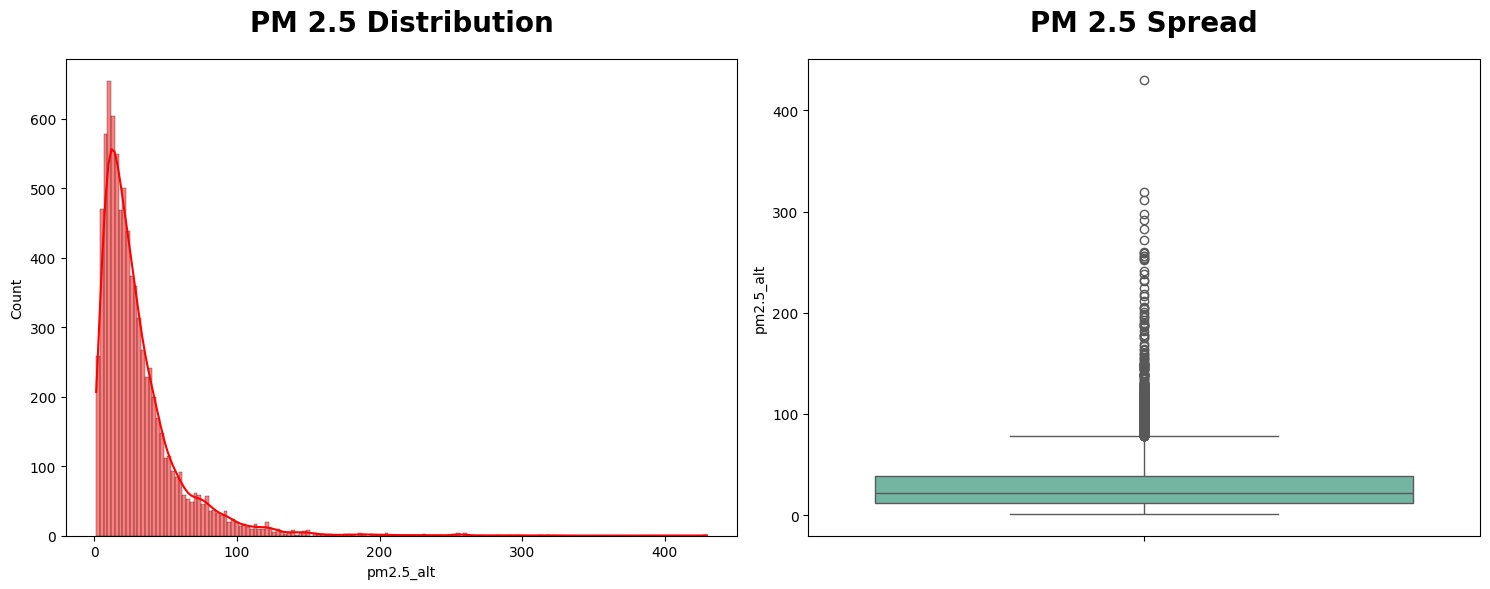

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df_normalized["pm2.5_alt"], color="red", kde=True)
plt.title("PM 2.5 Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_normalized["pm2.5_alt"],palette="Set2")
plt.title("PM 2.5 Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

9. Looking for Outliers

In [83]:
X = df_normalized.drop(columns=['pm2.5_alt', 'time_stamp'])
y = df_normalized['pm2.5_alt']

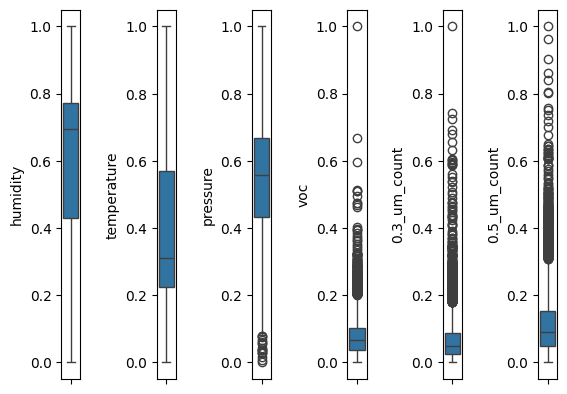

In [85]:
humidities = df_normalized['humidity']
temperatures = df_normalized['temperature']
pressures = df_normalized['pressure']
vocs = df_normalized['voc']
first_um_count = df_normalized['0.3_um_count']
second_um_count = df_normalized['0.5_um_count']
third_um_count = df_normalized['1.0_um_count']
fourth_um_count= df_normalized['2.5_um_count']
fifth_um_count = df_normalized['5.0_um_count']
sixth_um_count= df_normalized['10.0_um_count']

fig, axes = plt.subplots(1,6)
plt.subplots_adjust(wspace=4)
sns.boxplot(y=humidities, ax=axes[0])
sns.boxplot(y=temperatures, ax=axes[1])
sns.boxplot(y=pressures, ax=axes[2])
sns.boxplot(y=vocs, ax=axes[3])
sns.boxplot(y=first_um_count, ax=axes[4])
sns.boxplot(y=second_um_count, ax=axes[5])
plt.show()

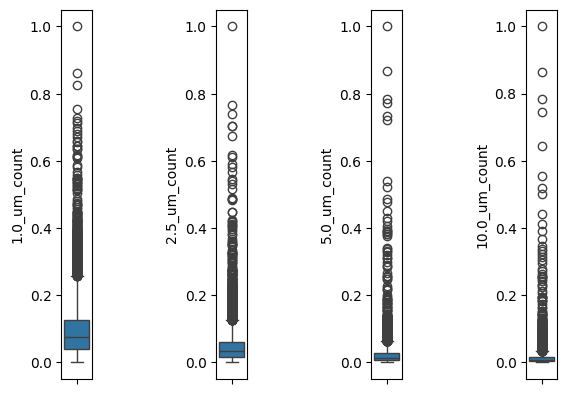

In [86]:
fig, axes = plt.subplots(1,4)
plt.subplots_adjust(wspace=4)
sns.boxplot(y=third_um_count, ax=axes[0])
sns.boxplot(y=fourth_um_count, ax=axes[1])
sns.boxplot(y=fifth_um_count, ax=axes[2])
sns.boxplot(y=sixth_um_count, ax=axes[3])
plt.show()

10. Showing Pair Plot

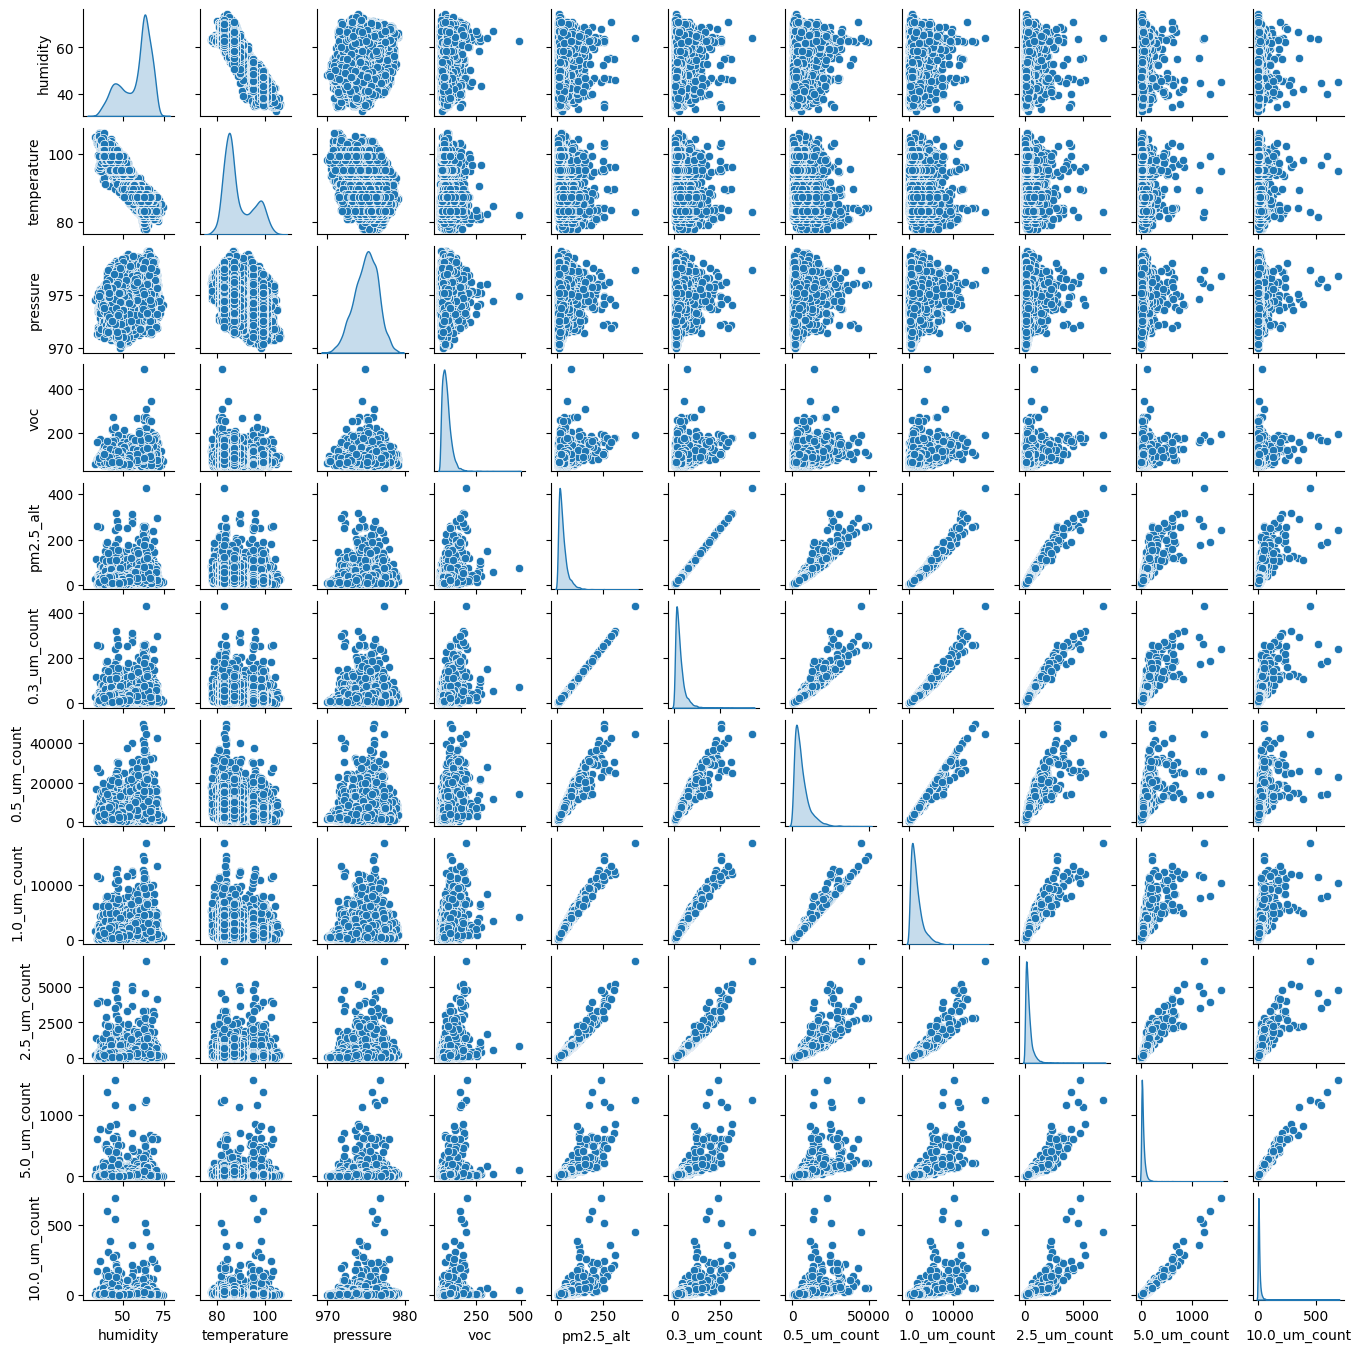

In [87]:
sns.pairplot(df, diag_kind='kde', height=1.25)
plt.show()

11. Showing the Heatmap

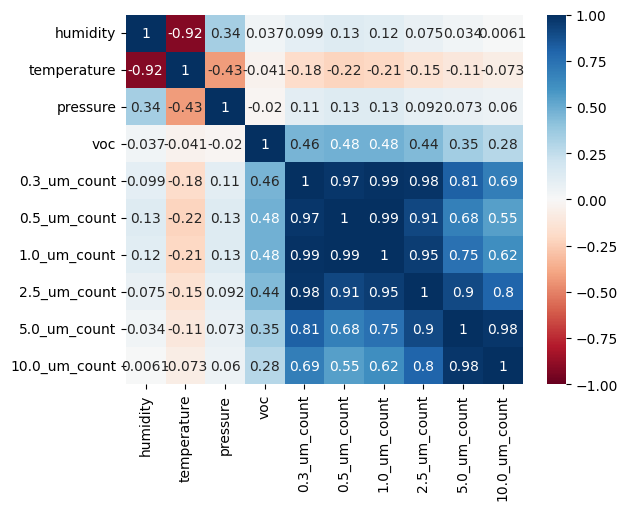

In [88]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

12. Train test split

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=0)

13. Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Intercept: {:0.4f}".format (regressor.intercept_))
print("Coefficient bl: {:0.4f}". format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}",format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}". format(regressor.coef_[6]))
print("Coefficient b8: {:0.4f}". format(regressor.coef_[7]))
print("Coefficient b9: {:0.4f}". format(regressor.coef_[8]))
print("Coefficient b10: {:0.4f}". format(regressor.coef_[9]))

Intercept: 46.6033
Coefficient bl: -17.7217
Coefficient b2: -32.8357
Coefficient b3: -2.2736
Coefficient b4: {:0.4f} -18.387805674238656
Coefficient b5: -2867.2274
Coefficient b6: 307.5707
Coefficient b7: 613.4898
Coefficient b8: 2468.2798
Coefficient b9: 21.0461
Coefficient b10: -587.3385


14. Evaluate Model

In [91]:
y_pred = regressor.predict(X_test)

In [92]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,18.2,27.891929
1,20.8,53.697048
2,28.1,17.743563
3,10.0,24.261315
4,30.3,33.367663


15. Root Mean Squared Error

In [93]:
from sklearn.metrics import mean_squared_error
print('RMSE : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE : 25.5803


16. Comparison between y_test and y_pred

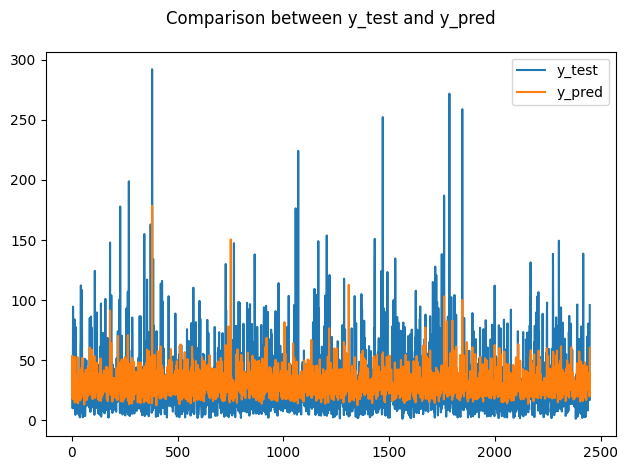

In [96]:
evaluate.plot(kind='line')
plt.title('Comparison between y_test and y_pred', pad=20)
plt.tight_layout()
plt.show()

17. Predicting with our own test case

In [97]:
air_quality = pd.DataFrame({
    'humidity' : [24.0],
    'temperature' : [98.0],
    'pressure' : [1011],
    'voc' : [89.537],
    '0.3_um_count' : [25.8],
    '0.5_um_count' : [4328.3482],
    '1.0_um_count' : [1432.984],
    '2.5_um_count' : [328.394],
    '5.0_um_count' : [27.6238],
    '10.0_um_count' : [4.018]
})

air_quality

,humidity,temperature,pressure,voc,0.3_um_count,0.5_um_count,1.0_um_count,2.5_um_count,5.0_um_count,10.0_um_count
0,24.0,98.0,1011,89.537,25.8,4328.3482,1432.984,328.394,27.6238,4.018


In [99]:
predicted_air_quality = regressor.predict(air_quality)

print(f"The predicted air quality is: {predicted_air_quality[0]}")
# hasilnya nggak sesuai

The predicted air quality is: 2937667.6230761446


/Users/malvera/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


18. Find out which parameters influenced air quality

In [94]:
correlation = df_normalized.corr()

In [95]:
pm_corr = correlation['pm2.5_alt'].drop(['pm2.5_alt', 'time_stamp'])
pm_corr

humidity         0.118888
temperature     -0.178480
pressure         0.081972
voc              0.125799
0.3_um_count     0.327554
0.5_um_count     0.328732
1.0_um_count     0.332560
2.5_um_count     0.315448
5.0_um_count     0.260756
10.0_um_count    0.208294
Name: pm2.5_alt, dtype: float64